## IMPORT LIBRARY


In [6]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [7]:
df = pd.read_csv("Iris.csv")
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
dtype: int64

In [10]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map(dict(enumerate(iris.target_names)))

In [11]:
df.shape

(150, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Plot distribution of numerical features using histograms.

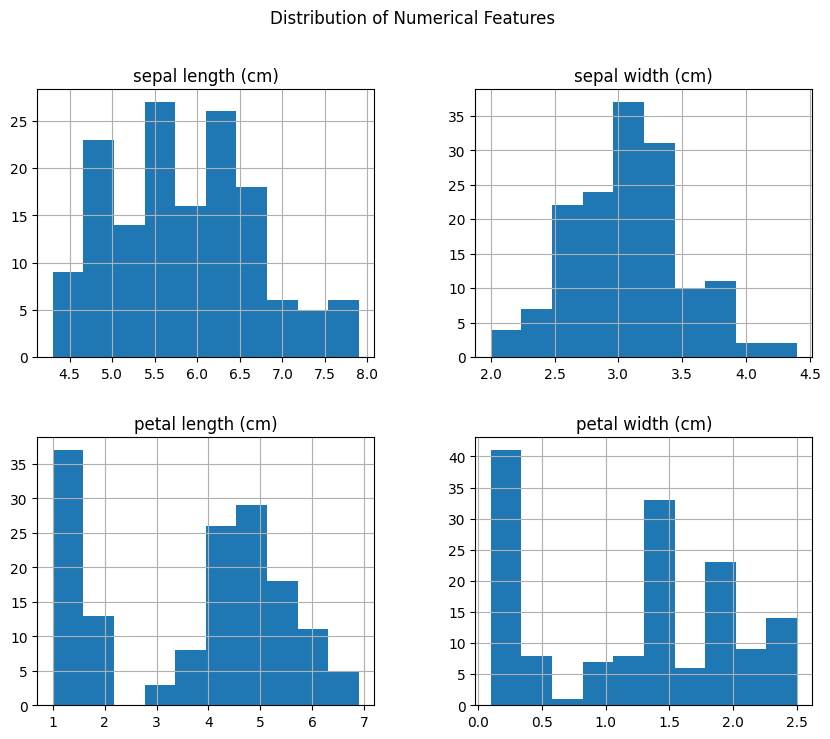

In [19]:
df.hist(figsize=(10, 8))
plt.suptitle("Distribution of Numerical Features")
plt.show()
# INSIGHT is Numerical features show near-normal distributions with some skewness


# Insight of Histogram
* Sepal features show near-normal distribution
* Petal features show slight right skew
* Petal features provide clearer separation between classes

### Analyze categorical features using count plots 

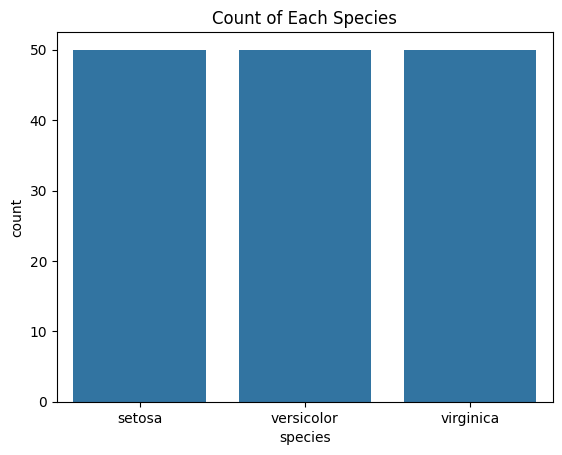

In [20]:
sns.countplot(x='species', data=df)
plt.title("Count of Each Species")
plt.show()
# Dataset is balanced across all species 

# Insight of Count Plot
* All species have equal representation
* Dataset is balanced
* No class imbalance issue

## Use box plots to identify outliers

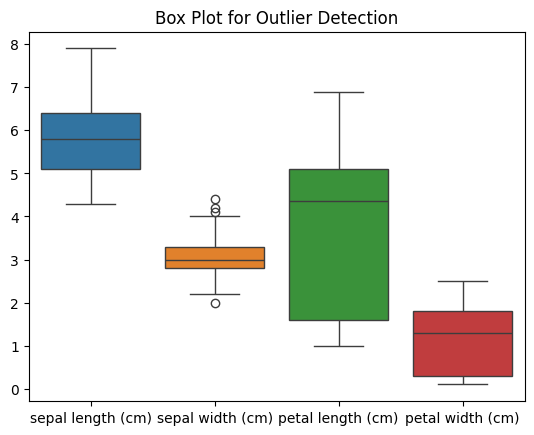

In [24]:
sns.boxplot(data=df.drop(columns='species'))
plt.title("Box Plot for Outlier Detection")
plt.show()

# Insight of Box Plot
* Mild outliers present in sepal width
* No extreme outliers detected
* Outliers do not require removal

### Plot correlation heatmap to understand feature relationships

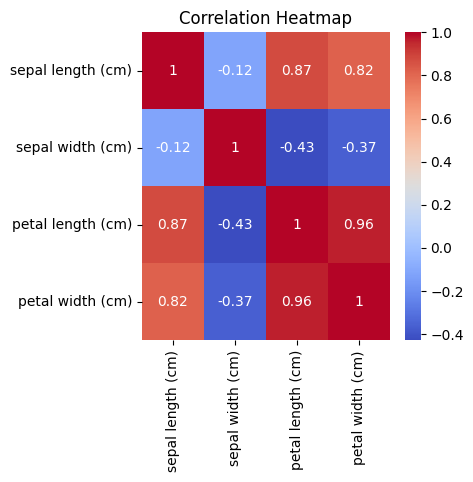

In [27]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.drop(columns='species').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Insights of Heat Map
* Strong correlation between petal length and petal width
* Sepal features show weaker correlation
* Indicates potential multicollinearity

### Identify features important for prediction

In [30]:
corr_target = df.drop(columns='species').corrwith(
    pd.Series(iris.target)
).sort_values(ascending=False)
corr_target

petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
dtype: float64

### Summarize findings in bullet points.


* Data contains no missing values
* Numerical features follow clear distributions
* Dataset is balanced across classes
* Mild outliers exist but are acceptable
* Strong correlation between petal features
* Petal length & width are key predictors

